In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

encodings = ['utf-8', 'latin1', 'cp1252']
file = 'spam.csv'

for encoding in encodings:
    try:
        df = pd.read_csv(file, encoding=encoding)
        print(f"Csv file successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read CSV file with encoding: {encoding}")

Failed to read CSV file with encoding: utf-8
Csv file successfully read with encoding: latin1


In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(columns =['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace = True)

In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.rename(columns ={'v1':'target','v2':'text'}, inplace=True)

In [7]:
df.sample(5)

,target,text
1448,spam,As a registered optin subscriber ur draw 4 å£1...
977,ham,Dont hesitate. You know this is the second tim...
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\..."
1561,ham,Dnt worry...use ice pieces in a cloth pack.als...
3023,ham,I love ya too but try and budget your money be...


In [8]:
# Assuming df is your DataFrame containing 'target' column with labels

# Convert 'spam' to True and 'ham' to False
df['target'] = df['target'].map({'spam': 1, 'ham': 0})
df.head(5)
                               

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.shape

(5169, 2)

In [13]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

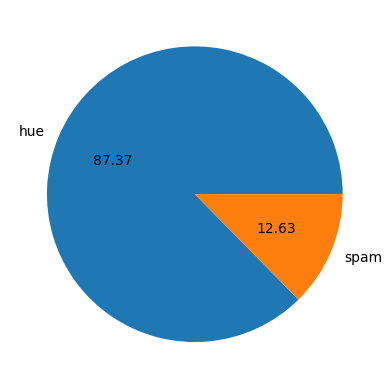

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.pie(df['target']. value_counts(), labels=['hue','spam'],autopct='%0.2f')
plt.show()


In [15]:
df['num_char'] = df['text'].apply(lambda x: len(x))


In [16]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
df.head(5)

,target,text,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df[['num_char','num_sentence','num_words']]. describe()

,num_char,num_sentence,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


<Axes: xlabel='num_char', ylabel='Count'>

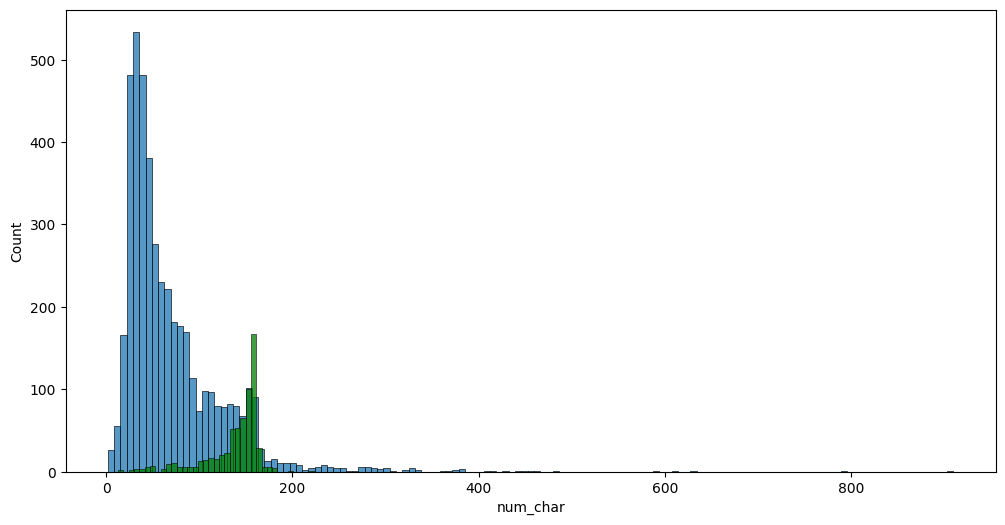

In [20]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

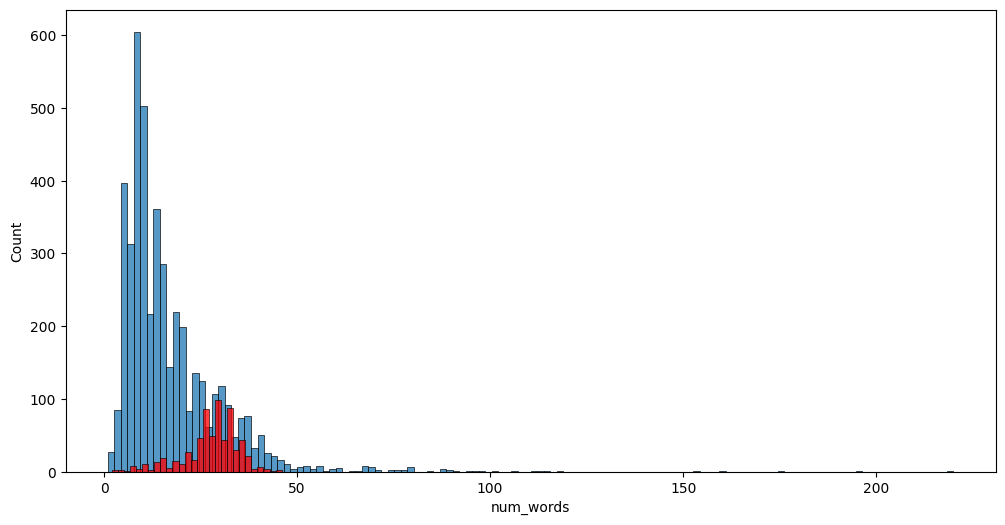

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

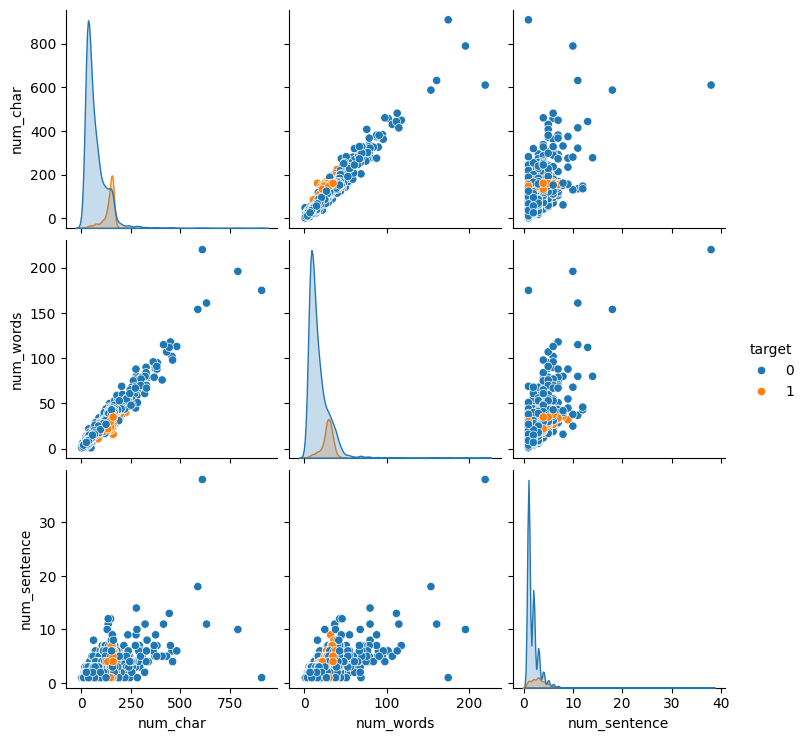

In [22]:
sns.pairplot(df,hue='target')

<Axes: >

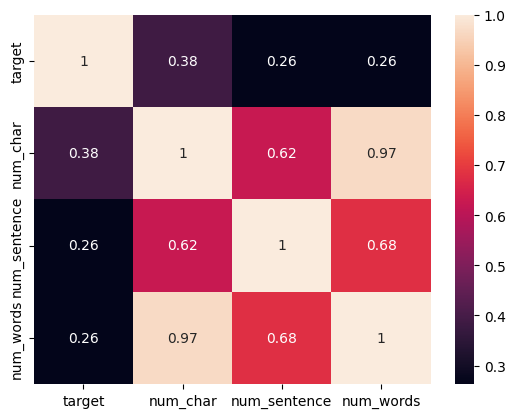

In [23]:
d_f =['target','num_char','num_sentence','num_words']
sns.heatmap(df[d_f].corr(),annot=True)

In [24]:

# Function to preprocess text data
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'\W', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)


    # Remove special characters
    words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in tokens]    
        
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply preprocessing to the 'test' column and create a new column 'preprocessed_text'
df['preprocessed_text'] = df['text'].apply(preprocess_text)

# Split the dataset into features (X) and labels (y)
X = df['preprocessed_text']  # Assuming 'preprocessed_text' 
y = df['target']  
from collections import Counter

def preprocessed_text(text):
    # Flatten the list of preprocessed messages
    all_words = [word for message in text for word in message]

    # Count the occurrence of each word
    word_counts = Counter(all_words)

    return word_counts

# Print the first few rows of the preprocessed text column
print("Preprocessed text:")
print(X.head())

# Print the first few rows of the labels
print("\ntarget:")
print(y.head())
word_counts = preprocessed_text(X)
print(word_counts)

Preprocessed text:
0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: preprocessed_text, dtype: object

target:
0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int64
Counter({' ': 43446, 'e': 20112, 'a': 15930, 't': 15515, 'o': 14701, 'i': 12782, 'r': 11823, 'n': 11762, 'l': 11594, 's': 9478, 'c': 7322, 'h': 6947, 'd': 6907, 'm': 6761, 'u': 6641, 'p': 5772, 'g': 5412, 'w': 4466, 'k': 4214, 'b': 3476, 'y': 3024, 'f': 2993, '0': 2756, 'v': 2294, '2': 1515, '1': 1475, 'x': 1452, '8': 1121, '5': 908, '4': 896, '7': 748, '3': 744, '6': 676, '9': 559, 'j': 514, 'z': 438, 'å': 322, 'q': 211, 'ì': 180, '_': 148, 'û': 69, 'ï': 55, 'õ': 37, 'ò': 11, 'ó': 6, 'ª': 3, 'ð': 3, 'ô': 2, 'á': 2, '¼': 1, 'è': 1, 'ä': 1, 'â': 1, 'ö': 1})


In [25]:
# Split the dataset into features and labels
X = df['text']
y = df['target']

# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9825918762088974
Confusion Matrix:
[[880   9]
 [  9 136]]


# Interpreting this confusion matrix:

True Positive (TP): 880 instances were correctly predicted as positive.
True Negative (TN): 136 instances were correctly predicted as negative.
False Positive (FP): 9 instances were incorrectly predicted as positive.
False Negative (FN): 9 instances were incorrectly predicted as negative.
In this scenario, the model seems to be performing well overall, with a high number of true positives and true negatives, and relatively low numbers of false positives and false negatives.





In [26]:
# Importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt




In [27]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Building a pipeline for feature extraction and classification
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(probability=True))
])



In [20]:

# Define hyperparameters for grid search
param_grid_svm = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(10, 10), (10, 20)],
    'svm__C': [1, 1000, 10],
    'svm__kernel': ['linear', 'rbf']}

In [21]:

# Perform grid search to find the best model
grid_search = GridSearchCV(pipeline_svm, param_grid=param_grid_svm, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Getting the best model from grid search
best_model = grid_search.best_estimator_

# Making predictions
predictions = best_model.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END svm__C=1, svm__kernel=linear, tfidf__max_df=0.5, tfidf__ngram_range=(10, 10); total time=   1.7s
[CV] END svm__C=1, svm__kernel=linear, tfidf__max_df=0.5, tfidf__ngram_range=(10, 10); total time=   1.7s
[CV] END svm__C=1, svm__kernel=linear, tfidf__max_df=0.5, tfidf__ngram_range=(10, 10); total time=   1.6s
[CV] END svm__C=1, svm__kernel=linear, tfidf__max_df=0.5, tfidf__ngram_range=(10, 10); total time=   1.8s
[CV] END svm__C=1, svm__kernel=linear, tfidf__max_df=0.5, tfidf__ngram_range=(10, 10); total time=   1.7s
[CV] END svm__C=1, svm__kernel=linear, tfidf__max_df=0.5, tfidf__ngram_range=(10, 20); total time=   6.6s
[CV] END svm__C=1, svm__kernel=linear, tfidf__max_df=0.5, tfidf__ngram_range=(10, 20); total time=   6.5s
[CV] END svm__C=1, svm__kernel=linear, tfidf__max_df=0.5, tfidf__ngram_range=(10, 20); total time=   6.4s
[CV] END svm__C=1, svm__kernel=linear, tfidf__max_df=0.5, tfidf__ngram_range=(10, 20); tot

In [22]:

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, predictions)

In [23]:

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9061895551257253
Precision: 1.0
Recall: 0.3310344827586207
F1 Score: 0.49740932642487046
ROC AUC Score: 0.7137931034482758
Confusion Matrix:
[[889   0]
 [ 97  48]]


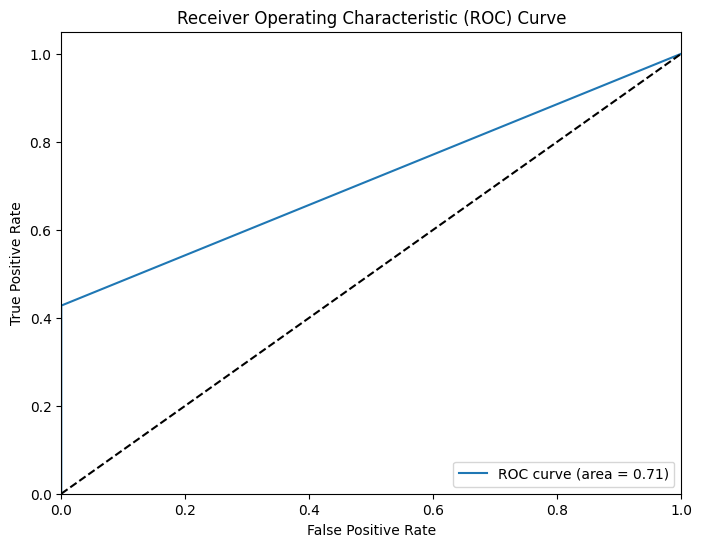

In [24]:

# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

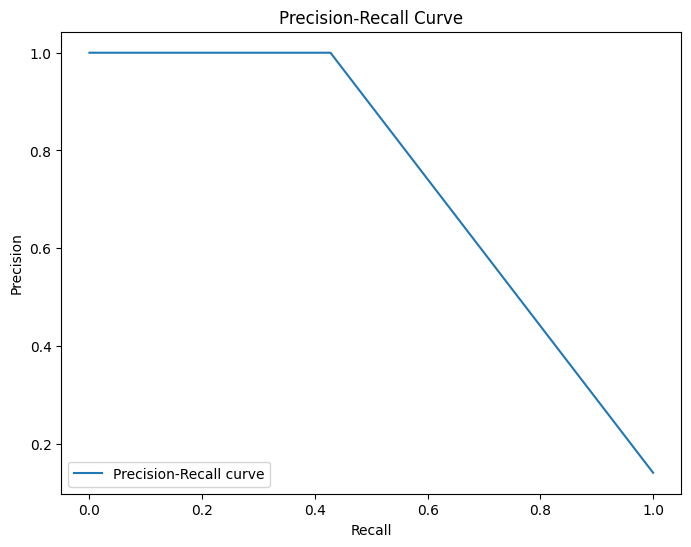

In [25]:
# Plotting Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()